<a href="https://colab.research.google.com/github/bekka9/Suicide-prediction-linear-regression-/blob/main/suicide_analys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import matplotlib
from matplotlib import pyplot as plt

from typing import Tuple
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import scipy.linalg as sla
import matplotlib.pyplot as plt
import random
import statistics as stat
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
#csv_file_path = '/content/drive/My Drive/data.csv'
#df = pd.read_csv(csv_file_path)
p_level = 0.95
a_level = 1 - p_level

In [ ]:
num_suicide = pd.read_excel('D:/spbu/НИР/data/num_suicide.xlsx')
alco = pd.read_excel('D:/spbu/НИР/data/алко20192022.xlsx')
#HIV = pd.read_excel('/content/drive/MyDrive/spbu/NIR/data/HIV.xlsx')
cash_income = pd.read_excel('D:/spbu/НИР/data/cash_income(mean).xlsx')
healty_lifestyle = pd.read_excel('D:/spbu/НИР/data/healty_lifestyle.xlsx')
incomes_below_the_poverty_line = pd.read_excel('D:/spbu/НИР/data/incomes_below_the_poverty_line.xlsx')
mental_disorder = pd.read_excel('D:/spbu/НИР/data/mental_disorder.xlsx')
num_crimes = pd.read_excel('D:/spbu/НИР/data/num_of_criminals.xlsx')
poverty_level = pd.read_excel('D:/spbu/НИР/data/poverty_level.xlsx')
rape_num = pd.read_excel('D:/spbu/НИР/data/rape.xlsx') #per10000
employee_ratio = pd.read_excel('D:/spbu/НИР/data/ratio_of_the_employees_to_the_population_in_working_age.xlsx')

In [ ]:
num_suicide

,округ,2018,2019,2020,2021,2022
0,Российская Федерация,12.4,11.7,11.3,10.71,9.24
1,Белгородская область,12.1,11.0,9.4,9.96,9.51
2,Брянская область,11.9,11.3,15.5,14.12,11.31
3,Владимирская область,14.4,14.3,13.7,14.93,13.04
4,Воронежская область,13.7,11.1,12.2,10.67,8.59
...,...,...,...,...,...,...
80,Амурская область,33.0,30.2,29.0,27.54,28.69
81,Магаданская область,4.9,16.3,12.2,6.50,11.84
82,Сахалинская область,2.9,0.4,0.4,0.21,0.65
83,Еврейская автономная область,32.9,32.7,21.0,28.36,31.65


In [ ]:
'''
num_suicide['2018'] = num_suicide['2018']*10000
num_suicide['2019'] = num_suicide['2019']*10000
num_suicide['2020'] = num_suicide['2020']*10000
num_suicide['2021'] = num_suicide['2021']*10000
num_suicide['2022'] = num_suicide['2022']*10000
num_suicide
'''

"\nnum_suicide['2018'] = num_suicide['2018']*10000\nnum_suicide['2019'] = num_suicide['2019']*10000\nnum_suicide['2020'] = num_suicide['2020']*10000\nnum_suicide['2021'] = num_suicide['2021']*10000\nnum_suicide['2022'] = num_suicide['2022']*10000\nnum_suicide\n"

In [ ]:
# Числовые признаки
num_cols = [
        'alco',
        'cash_income',
        'mental_disorder',
        'num_crimes',
        'poverty_level',
        'rape_num',
        'employee_ratio'
]
# Категориальные признаки
cat_cols = [
    'district'
]

feature_cols = num_cols + cat_cols
target_col = 'num_suicide'

In [ ]:
num_suicide

,округ,2018,2019,2020,2021,2022
0,Российская Федерация,12.4,11.7,11.3,10.71,9.24
1,Белгородская область,12.1,11.0,9.4,9.96,9.51
2,Брянская область,11.9,11.3,15.5,14.12,11.31
3,Владимирская область,14.4,14.3,13.7,14.93,13.04
4,Воронежская область,13.7,11.1,12.2,10.67,8.59
...,...,...,...,...,...,...
80,Амурская область,33.0,30.2,29.0,27.54,28.69
81,Магаданская область,4.9,16.3,12.2,6.50,11.84
82,Сахалинская область,2.9,0.4,0.4,0.21,0.65
83,Еврейская автономная область,32.9,32.7,21.0,28.36,31.65


In [ ]:
list(incomes_below_the_poverty_line)

['округ', '2018', '2019', '2020', '2021', '2022']

In [ ]:
year_ = '2019'
df2019 = pd.concat([
    num_suicide[['округ']],
    num_suicide[[year_]],
    alco[[year_]],
    cash_income[[year_]],
    incomes_below_the_poverty_line[[year_]],
    mental_disorder[[year_]],
    num_crimes[[year_]],
    poverty_level[[year_]],
    rape_num[[year_]],
    employee_ratio[[year_]]
], axis=1)
df2019.columns = ['district',
        'num_suicide',
        'alco',
        'cash_income',
        'incomes_below_the_poverty_line',
        'mental_disorder',
        'num_crimes',
        'poverty_level',
        'rape_num',
        'employee_ratio']
data = df2019

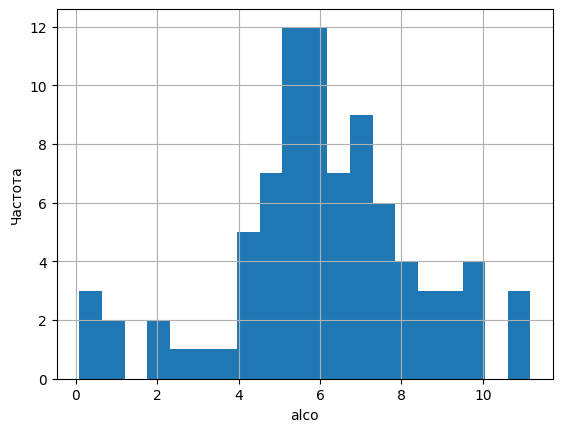

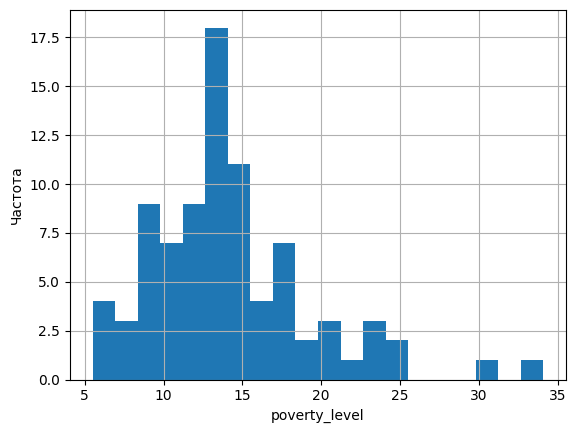

In [ ]:
'''Визуализация разброса значений
        на гистограмме'''
for i in range(len(num_cols)):
#  fig = px.histogram(data, x=num_cols[i], histfunc='count')
#  fig.show()
  df2019[num_cols[i]].hist(bins=20)

  plt.xlabel(num_cols[i])
  plt.ylabel('Частота')
  plt.show()

In [ ]:
data['num_crimes'].skew()

9.123644847909572

правая часть сильно удлиненна (правосторонняя асимметрия)

0.6691514139126543


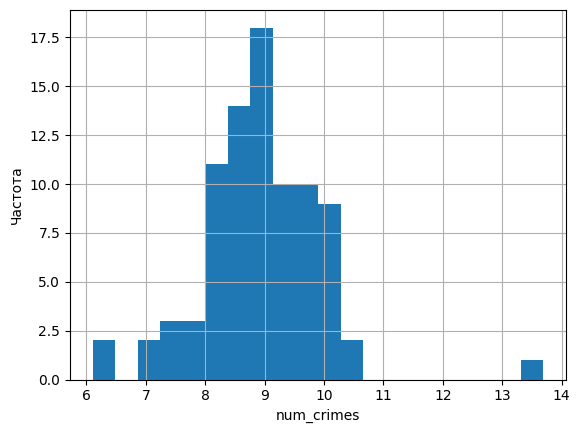

In [ ]:
data['num_crimes'].apply(np.log).hist(bins=20)
data['num_crimes'] = data['num_crimes'].apply(np.log)
print(data['num_crimes'].skew())
plt.xlabel('num_crimes')
plt.ylabel('Частота')
plt.show()

In [ ]:
data['cash_income'].skew()

2.290196791926173

правосторонняя асимметрия

1.2772666361187355


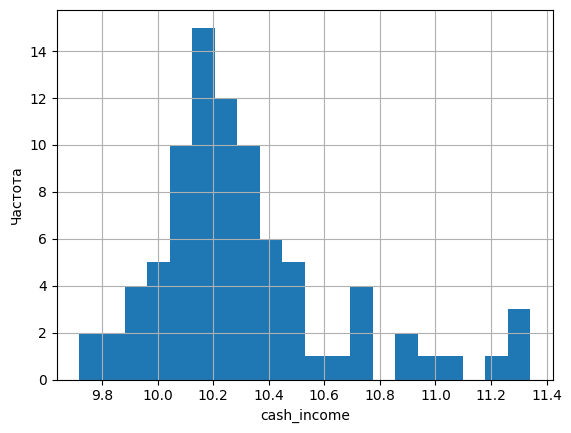

In [ ]:
data['cash_income'] = data['cash_income'].apply(np.log)
data['cash_income'].hist(bins=20)
print(data['cash_income'].skew())
plt.xlabel('cash_income')
plt.ylabel('Частота')
plt.show()

In [ ]:
data['poverty_level'].skew()

1.214506210843119

-0.030526030981261176


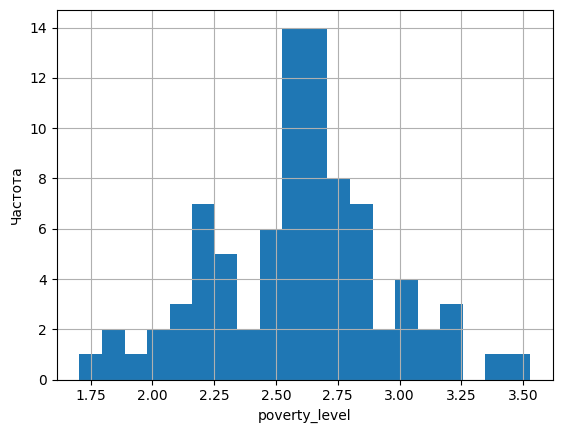

In [ ]:
data['poverty_level'] = data['poverty_level'].apply(np.log)
data['poverty_level'].hist(bins=20)
print(data['poverty_level'].skew())
plt.xlabel('poverty_level')
plt.ylabel('Частота')
plt.show()

-0.03052603098126121


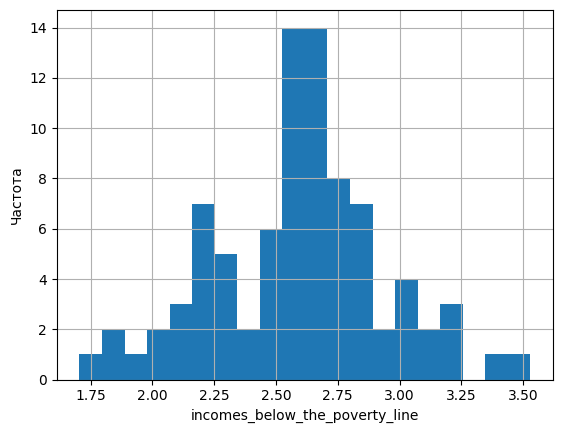

In [ ]:
data['incomes_below_the_poverty_line'] = data['incomes_below_the_poverty_line'].apply(np.log)
data['incomes_below_the_poverty_line'].hist(bins=20)
print(data['incomes_below_the_poverty_line'].skew())
plt.xlabel('incomes_below_the_poverty_line')
plt.ylabel('Частота')
plt.show()

In [ ]:
data['employee_ratio'].skew()

1.0931855403799084

0.3327050995879267


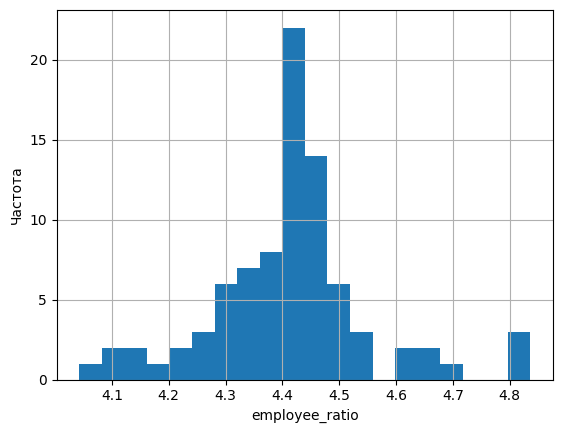

In [ ]:
data['employee_ratio'].apply(np.log).hist(bins=20)
data['employee_ratio'] = data['employee_ratio'].apply(np.log)
print(data['employee_ratio'].skew())
plt.xlabel('employee_ratio')
plt.ylabel('Частота')
plt.show()

In [ ]:
data['rape_num'].skew()

9.05074953389023

In [ ]:
#data['rape_num'].apply(np.log).hist(bins=1000)
print(data['rape_num'].skew())

9.05074953389023


In [ ]:
data['mental_disorder'].skew()

9.088030199503484

0.4731532100635249


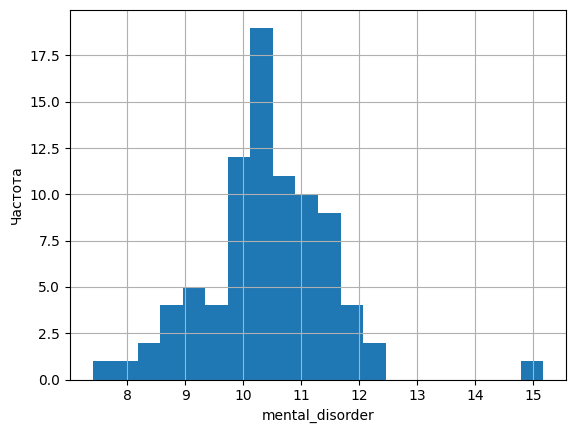

In [ ]:
data['mental_disorder'] = data['mental_disorder'].apply(np.log)
data['mental_disorder'].hist(bins=20)
print(data['mental_disorder'].skew())
plt.xlabel('mental_disorder')
plt.ylabel('Частота')
plt.show()

In [ ]:
data['alco'].skew()

-0.41240067380840595

In [ ]:
def count_plot(column_name, hue = None, rotation = 0):
    """
    1) input : column name, column data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) i use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x = column_name, data = data, hue = hue, order = data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)

    plt.xticks(rotation = rotation)
    plt.show()
def box_plot(x_axis = None, y_axis = None):
    sns.boxplot(x = x_axis, y = y_axis, data = data)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

In [ ]:
'''
sum_counts = data['num_suicide'].value_counts().sort_index()
targetfig = go.Figure(go.Pie(values=sum_counts, labels=sum_counts.index),
                     layout=go.Layout(title=go.layout.Title(text="target")))
targetfig.show()
'''

'\nsum_counts = data[\'num_suicide\'].value_counts().sort_index()\ntargetfig = go.Figure(go.Pie(values=sum_counts, labels=sum_counts.index),\n                     layout=go.Layout(title=go.layout.Title(text="target")))\ntargetfig.show()\n'

In [ ]:
data

,district,num_suicide,alco,cash_income,incomes_below_the_poverty_line,mental_disorder,num_crimes,poverty_level,rape_num,employee_ratio
0,Российская Федерация,11.7,6.0336,10.477457,2.509599,15.185182,13.692960,2.509599,3177,4.461300
1,Белгородская область,11.0,4.9824,10.385852,2.054124,10.518619,8.772765,2.054124,5,4.476200
2,Брянская область,11.3,5.5272,10.254919,2.624669,10.020426,8.860499,2.624669,17,4.347694
3,Владимирская область,14.3,7.6111,10.142150,2.533697,10.690034,8.870663,2.533697,18,4.458988
4,Воронежская область,11.1,4.9702,10.374178,2.186051,11.093873,9.343734,2.186051,38,4.454347
...,...,...,...,...,...,...,...,...,...,...
80,Амурская область,30.2,7.2232,10.413433,2.753661,10.165583,8.978787,2.753661,33,4.457830
81,Магаданская область,16.3,10.6641,11.087773,2.230014,8.191186,7.349231,2.230014,5,4.681205
82,Сахалинская область,0.4,11.1699,10.985564,2.104134,9.416948,8.344980,2.104134,3,4.601162
83,Еврейская автономная область,32.7,8.4527,10.188742,3.173878,8.709630,7.221836,3.173878,6,4.265493


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   district                        85 non-null     object 
 1   num_suicide                     85 non-null     float64
 2   alco                            85 non-null     float64
 3   cash_income                     85 non-null     float64
 4   incomes_below_the_poverty_line  85 non-null     float64
 5   mental_disorder                 85 non-null     float64
 6   num_crimes                      85 non-null     float64
 7   poverty_level                   85 non-null     float64
 8   rape_num                        85 non-null     int64  
 9   employee_ratio                  85 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 6.8+ KB


In [ ]:
data.duplicated().any()

False

In [ ]:
data.describe(include = object)

,district
count,85
unique,85
top,Российская Федерация
freq,1


In [ ]:
data.drop(index = 0, inplace = True)
data.reset_index(drop= True , inplace= True )

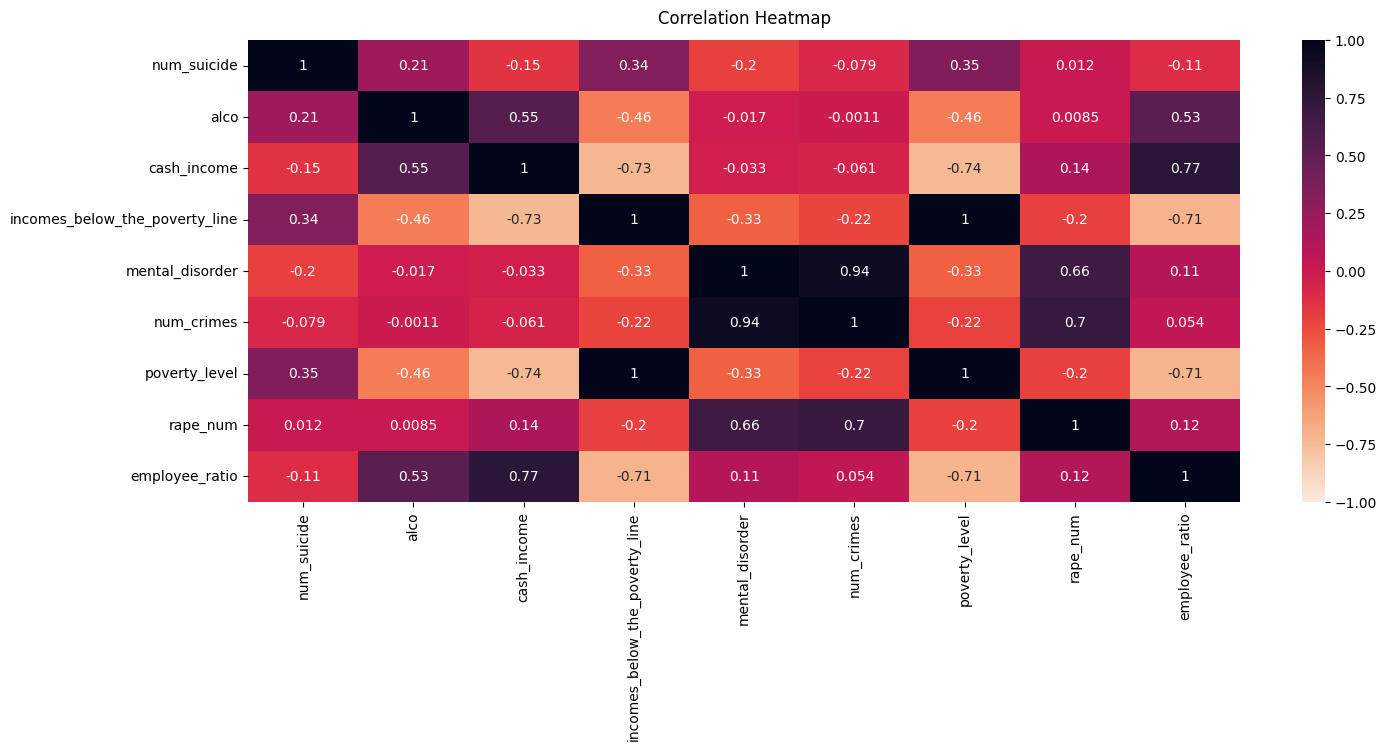

,district,num_suicide,alco,cash_income,incomes_below_the_poverty_line,mental_disorder,num_crimes,poverty_level,rape_num,employee_ratio
0,Белгородская область,11.0,4.9824,10.385852,2.054124,10.518619,8.772765,2.054124,5,4.476200
1,Брянская область,11.3,5.5272,10.254919,2.624669,10.020426,8.860499,2.624669,17,4.347694
2,Владимирская область,14.3,7.6111,10.142150,2.533697,10.690034,8.870663,2.533697,18,4.458988
3,Воронежская область,11.1,4.9702,10.374178,2.186051,11.093873,9.343734,2.186051,38,4.454347
4,Ивановская область,17.2,6.7099,10.157897,2.653242,10.543498,8.573952,2.653242,12,4.395683


In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.cm.rocket_r)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

data.head()

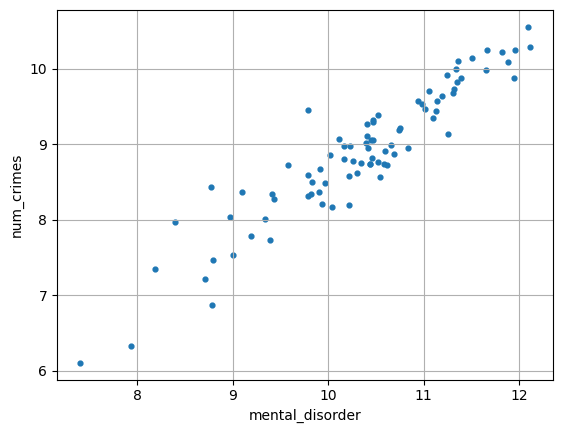

In [ ]:
#график рассеяния
xs = data['mental_disorder']#.apply( np.log )
ys = data['num_crimes']#.apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('mental_disorder')
plt.ylabel('num_crimes')
plt.show()

Результат ясно показывает, что между этими двумя переменными имеется связь.

имплементация корреляции Пирсона

In [ ]:
print(data['mental_disorder'].corr(data['num_crimes']))

0.9356465287858167


переменные сильно коррелируют

In [ ]:
#data.drop(columns = "num_crimes", inplace = True)

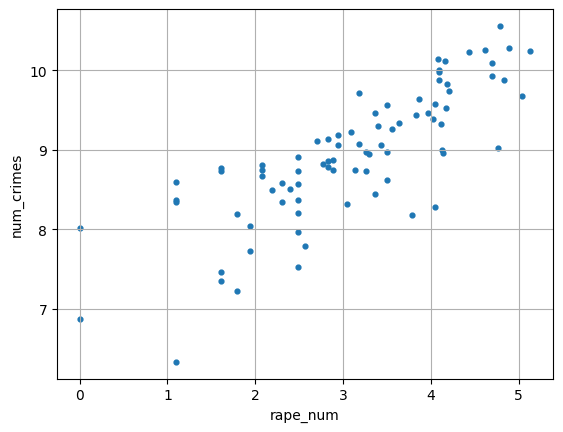

In [ ]:
#график рассеяния
xs = data['rape_num'].apply( np.log )
ys = data['num_crimes']#.apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('rape_num')
plt.ylabel('num_crimes')
plt.show()

имплементация корреляции Пирсона

In [ ]:
x = data['rape_num']
print(x.corr(data['num_crimes']))

0.7011446801844059


переменные  коррелируют

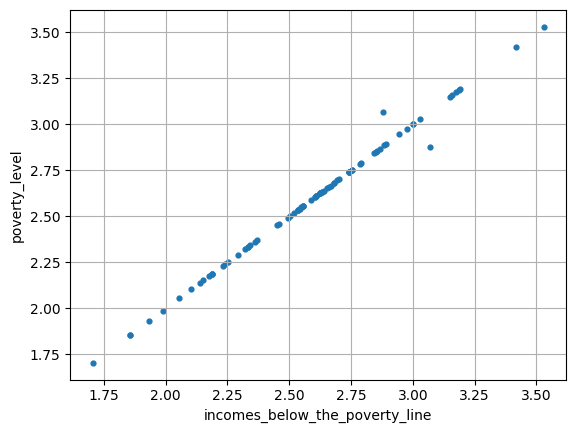

In [ ]:
#график рассеяния
xs = data['incomes_below_the_poverty_line']
ys = data['poverty_level']
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('incomes_below_the_poverty_line')
plt.ylabel('poverty_level')
plt.show()

In [ ]:
print(data['incomes_below_the_poverty_line'].corr(data['poverty_level']))

0.9965217417910125


переменные сильно коррелируют

In [ ]:
#

In [ ]:
def jitter(limit):
    '''Генератор джиттера (произвольного сдвига точек данных)'''
    return lambda x: random.uniform(-limit, limit) + x
def t_statistic(xs, ys):
    '''Вычисление t-статистики'''
    r = xs.corr(ys)
    df = xs.count() - 2
    return r * np.sqrt(df / 1 - r ** 2)
def t_test(xs, ys):
    '''Выполнение двухстороннего t-теста'''
    t_value = t_statistic(xs, ys)
    df = xs.count() - 2
    p = 2 * stats.t.sf(t_value, df)  # функция выживания
    return {'t-значение':t_value, 'p-значение':p}

In [ ]:
t_test(data['incomes_below_the_poverty_line'],data['poverty_level'])

{'t-значение': 8.969080126971338, 'p-значение': 8.292094798620893e-14}

 Мы вынуждены принять альтернативную гипотезу о существовании корреляции.

In [ ]:
data.drop(columns = "incomes_below_the_poverty_line", inplace = True)

In [ ]:
t_test(data['rape_num'],data['num_crimes'])

{'t-значение': 6.330074436489531, 'p-значение': 1.2331414173069111e-08}

In [ ]:
data.drop(columns = "rape_num", inplace = True)

In [ ]:
t_test(data['mental_disorder'],data['num_crimes'])

{'t-значение': 8.427291235284113, 'p-значение': 9.917283607862887e-13}

In [ ]:
data.drop(columns = "num_crimes", inplace = True)

In [ ]:
t_test(data['cash_income'],data['employee_ratio'])

{'t-значение': 6.978713561142164, 'p-значение': 7.054973677680329e-10}

In [ ]:
data.drop(columns = "cash_income", inplace = True)

In [ ]:
t_test(data['poverty_level'],data['employee_ratio'])

{'t-значение': -6.445230992257486, 'p-значение': 1.9999999925387852}

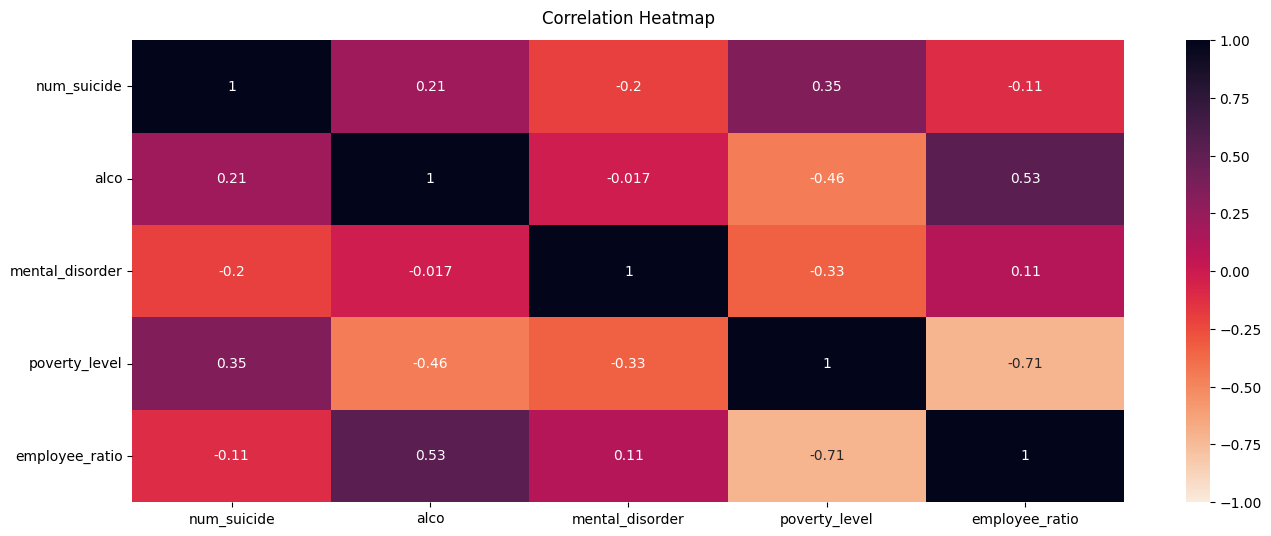

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.cm.rocket_r)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [ ]:
'''for i, feature in enumerate(num_cols):
    fig, ax = plt.subplots(1, 1, figsize=(10,8))
    sns.histplot(
        data=data,
        x=feature,
        ax=ax,
        hue=target_col,
        kde=True,
        bins=50
    )
    ax.set_title(f"распределение целевого признака по столбцу {feature}")
    plt.show()
    print(f"Описательные статистики по столбцу {feature} в зависимости от статуса")
    display(
        data.groupby(target_col)[feature].describe()
    )'''

'for i, feature in enumerate(num_cols):\n    fig, ax = plt.subplots(1, 1, figsize=(10,8))\n    sns.histplot(\n        data=data,\n        x=feature,\n        ax=ax,\n        hue=target_col,\n        kde=True,\n        bins=50\n    )\n    ax.set_title(f"распределение целевого признака по столбцу {feature}")\n    plt.show()\n    print(f"Описательные статистики по столбцу {feature} в зависимости от статуса")\n    display(\n        data.groupby(target_col)[feature].describe()\n    )'

Описательная статистика

In [ ]:
data.describe()

,num_suicide,alco,mental_disorder,poverty_level,employee_ratio
count,84.000000,84.000000,84.000000,84.000000,84.000000
mean,13.995238,6.106635,10.344167,2.596288,4.412167
std,8.933016,2.355985,0.982123,0.351485,0.142737
min,0.200000,0.088900,7.396949,1.704748,4.043051
25%,7.050000,4.979350,9.827973,2.356092,4.354455
50%,13.750000,5.995500,10.440750,2.617369,4.415824
75%,18.050000,7.477125,11.064654,2.786550,4.465620
max,36.400000,11.169900,12.120133,3.529297,4.836282


In [ ]:
# Числовые признаки
num_cols = [
        'alco',
        'mental_disorder',
        'poverty_level',
        'employee_ratio'
]

<Figure size 1169.29x826.772 with 0 Axes>

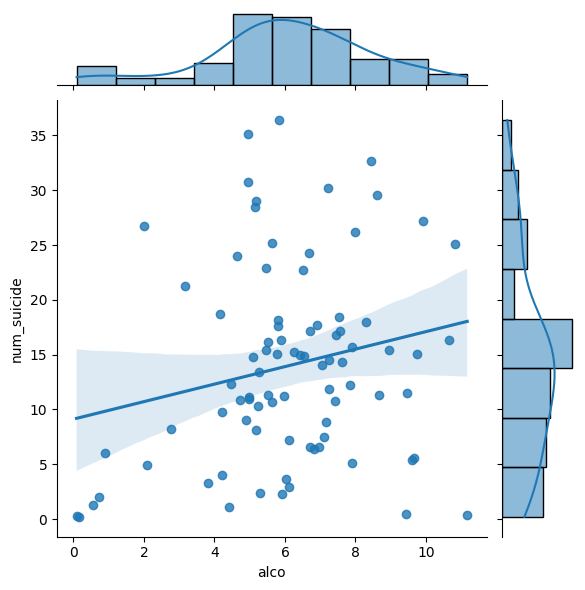

<Figure size 1169.29x826.772 with 0 Axes>

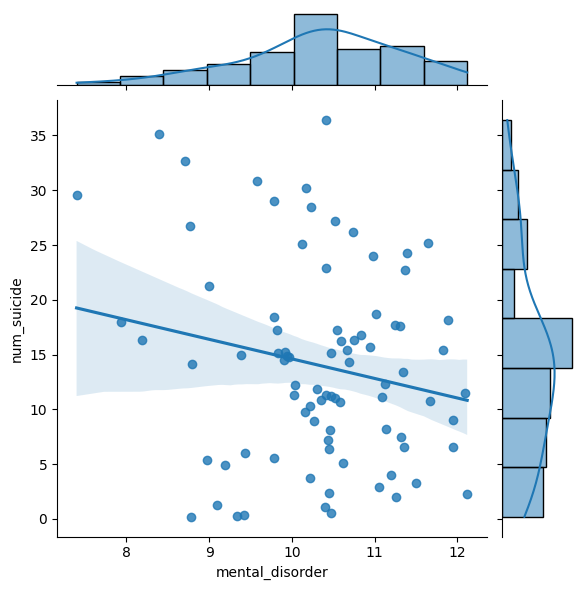

<Figure size 1169.29x826.772 with 0 Axes>

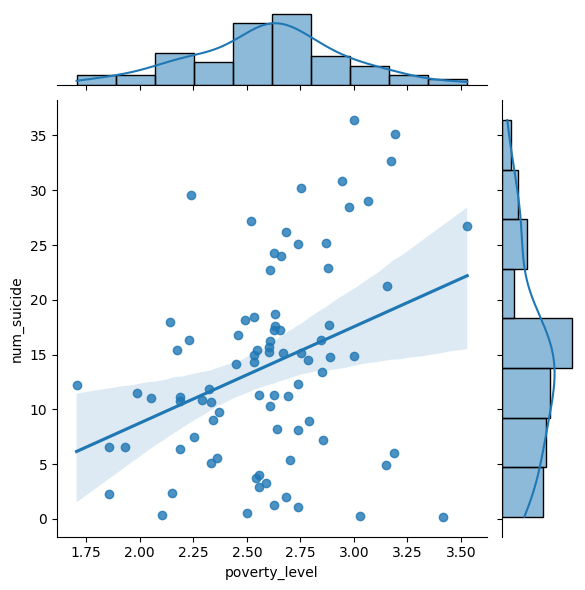

<Figure size 1169.29x826.772 with 0 Axes>

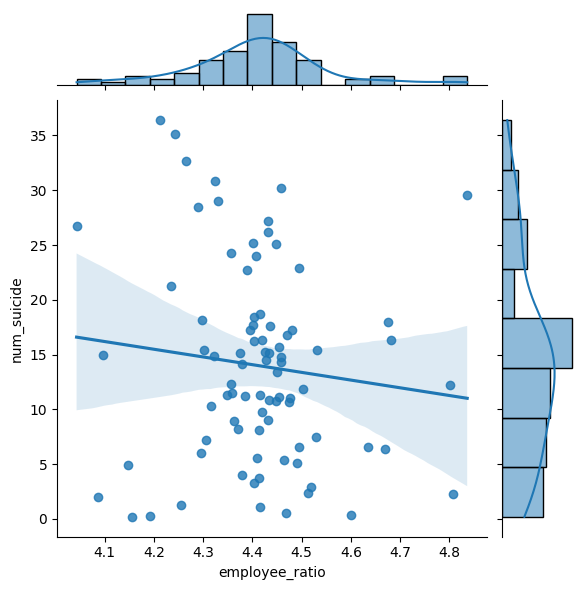

In [ ]:
import seaborn as sns
INCH = 25.4
for i in num_cols:
  fig = plt.figure(figsize=(297/INCH, 210/INCH))
  axes = sns.jointplot(
    x=data[i], y=data['num_suicide'],
    kind='reg',
    ci=95)
  plt.show()

In [ ]:
#Полиноминальная регрессия
'''
from sklearn.preprocessing import PolynomialFeatures
for i in num_cols:
    regr = LinearRegression()
    X = data[[i]].values
    y = data['num_suicide'].values
    #y = data['num_suicide'].values
    # create quadratic features
    quadratic = PolynomialFeatures(degree=2)
    cubic = PolynomialFeatures(degree=3)
    X_quad = quadratic.fit_transform(X)
    X_cubic = cubic.fit_transform(X)

    # fit features
    X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

    regr = regr.fit(X, y)
    y_lin_fit = regr.predict(X_fit)
    linear_r2 = r2_score(y, regr.predict(X))

    regr = regr.fit(X_quad, y)
    y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
    quadratic_r2 = r2_score(y, regr.predict(X_quad))


    # plot results
    plt.scatter(X, y, label='training points', color='lightgray')

    plt.plot(X_fit, y_lin_fit,
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2),
         color='blue',
         lw=2,
         linestyle=':')

    plt.plot(X_fit, y_quad_fit,
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red',
         lw=2,
         linestyle='-')


    plt.xlabel('% lower status of the population [LSTAT]')
    plt.ylabel('')
    plt.legend(loc='upper right')
    plt.show()
'''


"\nfrom sklearn.preprocessing import PolynomialFeatures\nfor i in num_cols:\n    regr = LinearRegression()\n    X = data[[i]].values\n    y = data['num_suicide'].values\n    #y = data['num_suicide'].values\n    # create quadratic features\n    quadratic = PolynomialFeatures(degree=2)\n    cubic = PolynomialFeatures(degree=3)\n    X_quad = quadratic.fit_transform(X)\n    X_cubic = cubic.fit_transform(X)\n\n    # fit features\n    X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]\n\n    regr = regr.fit(X, y)\n    y_lin_fit = regr.predict(X_fit)\n    linear_r2 = r2_score(y, regr.predict(X))\n\n    regr = regr.fit(X_quad, y)\n    y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))\n    quadratic_r2 = r2_score(y, regr.predict(X_quad))\n\n\n    # plot results\n    plt.scatter(X, y, label='training points', color='lightgray')\n\n    plt.plot(X_fit, y_lin_fit, \n         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), \n         color='blue', \n         lw=2, \n         linesty

In [ ]:
numeric_data = data[num_cols]
dummy_features = pd.get_dummies(data[cat_cols])
X = pd.concat([numeric_data, dummy_features], axis=1)
y = data[target_col]

In [ ]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(numeric_data, y)
y_pred = slr.predict(numeric_data)
num_cols = [
        'alco',
        'mental_disorder',
        'incomes_below_the_poverty_line',
        'employee_ratio'
]
for i in range (4):
    print(num_cols[i] + ' {:.2f}'.format(slr.coef_[i]))

print('Intercept: {:.2f}'.format(slr.intercept_))

alco 1.68
mental_disorder 0.06
incomes_below_the_poverty_line 15.72
employee_ratio 5.91
Intercept: -63.74


In [ ]:
np.linalg.det(numeric_data.corr())

0.2907862310137355

### График остатков

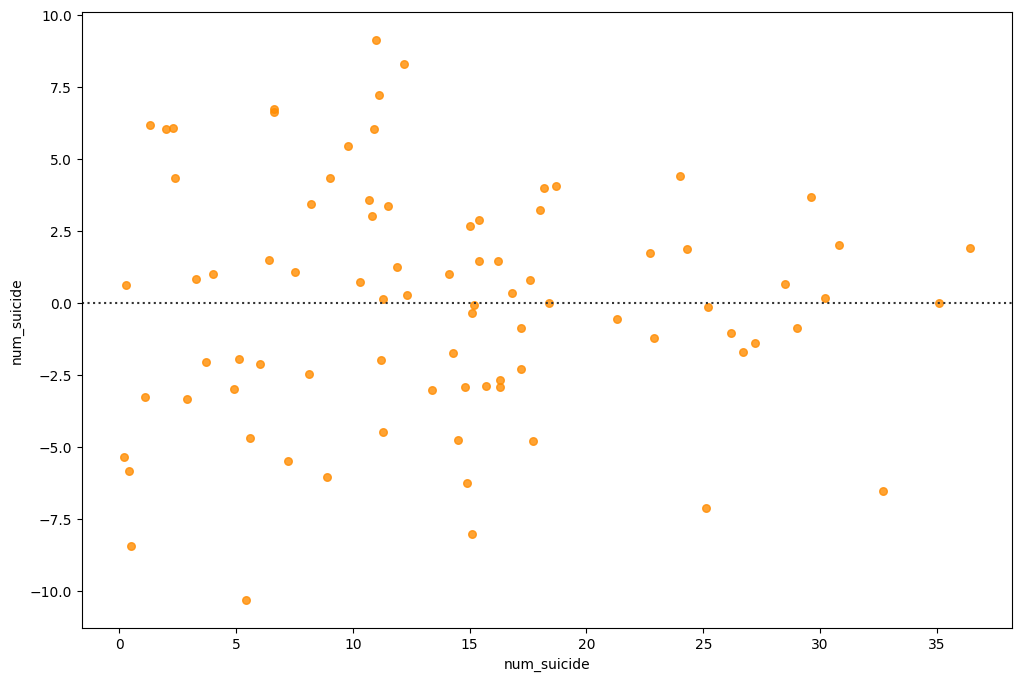

In [ ]:
residuals = y - y_pred
#define figure size
fig = plt.figure(figsize=(12,8))
# график остатков
title_axes_2 = 'График остатков'

sns.residplot(
    x=y, y=residuals,
    lowess=False,
    robust=False,
    scatter_kws={'s': 30, 'color': 'darkorange'})

plt.show()

In [ ]:
'''
plt.scatter(y_pred,  y_pred - y,
            c='blue', marker='o', label='Training data')
#plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
'''

"\nplt.scatter(y_pred,  y_pred - y,\n            c='blue', marker='o', label='Training data')\n#plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')\nplt.xlabel('Predicted values')\nplt.ylabel('Residuals')\nplt.legend(loc='upper left')\nplt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')\nplt.xlim([-10, 50])\nplt.tight_layout()\n"

### Величина средней ошибки аппроксимации  и оценка для дисперсии остатков

In [ ]:
n = len(num_suicide) - 1
var_res = sum((y - y_pred)**2)/(n)
apx = 1/n * np.sum(abs((y-y_pred)/ y)) * 100
print('\nошибка аппроксимации:', apx)
if (apx <= 15):
  print("Качество построенной модели оценивается как приемлимое")


ошибка аппроксимации: 281.45722302798134


### Множественный коэффициент детерминации R2

In [ ]:
r_sq = (1 - sum((y - y_pred)**2)/sum((y - y.mean())**2))
print("множественный коэффициент детерминации R2: ", r_sq)

множественный коэффициент детерминации R2:  0.2954427464594547


### значение F критерия и значимость полученного уравнения в целом на 5% уровне значимости

In [ ]:

m = 5
q = 0.05
F_statistic = r_sq/(1 - r_sq) * (n - m - 1) / (m)
F_critical = stats.f.ppf(1 - q, m, n - m - 1)
p_value = 1-stats.f.cdf(F_statistic, m, n - m - 1)
print(p_value)
if (abs(F_statistic) > F_critical):
  print("rejected, модель признается статистически значимой")
else: print("модель признается незначимой")

if (p_value < q):
  print("rejected, модель признается статистически значимой")
else: print("модель признается незначимой")

3.945880658551282e-05
rejected, модель признается статистически значимой
rejected, модель признается статистически значимой


In [ ]:
numeric_data

,alco,mental_disorder,poverty_level,employee_ratio
0,4.9824,10.518619,2.054124,4.476200
1,5.5272,10.020426,2.624669,4.347694
2,7.6111,10.690034,2.533697,4.458988
3,4.9702,11.093873,2.186051,4.454347
4,6.7099,10.543498,2.653242,4.395683
...,...,...,...,...
79,7.2232,10.165583,2.753661,4.457830
80,10.6641,8.191186,2.230014,4.681205
81,11.1699,9.416948,2.104134,4.601162
82,8.4527,8.709630,3.173878,4.265493


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y, y_pred),
        mean_squared_error(y, y_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y, y_pred),
        r2_score(y, y_pred)))

MSE train: 55.553, test: 55.553
R^2 train: 0.295, test: 0.295


In [ ]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

model_linear_ols = smf.ols(formula='num_suicide ~ alco + mental_disorder + poverty_level + employee_ratio', data=data)
result_linear_ols = model_linear_ols.fit()
print(result_linear_ols.summary())

                            OLS Regression Results                            
Dep. Variable:            num_suicide   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     8.282
Date:                Sun, 26 May 2024   Prob (F-statistic):           1.25e-05
Time:                        13:43:40   Log-Likelihood:                -287.92
No. Observations:                  84   AIC:                             585.8
Df Residuals:                      79   BIC:                             598.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -63.7441     48.890     

регрессионная модель объясняет 29.5% вариации переменной Y.

расчетный уровень значимости Prob (F-statistic) = 1.25e-05

так как значение Prob (F-statistic) < 0.05, то нулевая гипотеза R-squared = 0 НЕ ПРИНИМАЕТСЯ, т.е. коэффициент детерминации ЗНАЧИМ

расчетный уровень значимости P>|t| не превышает 0.05  у коэффициента при alco и poverty_level - это означает, что оба коэффициента регрессии значимы, остальные - нет



Анализ остатков модели:
Prob(Omnibus) = 0.909 — вероятность нормального распределения остатков (значение 1 указывает на совершенно нормальное распределение).
Skew = -0.107 и Kurtosis =  2.802 - показатели асимметрии и эксцесса остатков

#### Проверка адекватности модели

In [ ]:
def regression_model_adequacy_check(
    model_fit,
    p_level: float=0.95,
    model_name=''):

    n = int(model_fit.nobs)
    p = int(model_fit.df_model)    # Число степеней свободы регрессии, равно числу переменных модели (за исключением константы, если она присутствует)

    SST = model_fit.centered_tss    # SST (Sum of Squared Total)
    dfT = n-1
    MST = SST / dfT

    SSE = model_fit.ssr    # SSE (Sum of Squared Error)
    dfE = n - p - 1
    MSE = SSE / dfE

    F_calc = MST / MSE
    F_table = stats.f.ppf(p_level, dfT, dfE, loc=0, scale=1)
    a_calc = 1 - stats.f.cdf(F_calc, dfT, dfE, loc=0, scale=1)
    conclusion_model_adequacy_check = 'adequacy' if F_calc >= F_table else 'adequacy'

    # формируем результат
    result = pd.DataFrame({
        'SST': (SST),
        'SSE': (SSE),
        'dfT': (dfT),
        'dfE': (dfE),
        'MST': (MST),
        'MSE': (MSE),
        'p_level': (p_level),
        #'a_level': (a_level),
        'F_calc': (F_calc),
        'F_table': (F_table),
        'F_calc >= F_table': (F_calc >= F_table),
        'a_calc': (a_calc),
        #'a_calc <= a_level': (a_calc <= a_level),
        'adequacy_check': (conclusion_model_adequacy_check),
        },
        index=[model_name]
        )

    return result

regression_model_adequacy_check(result_linear_ols, p_level=0.95, model_name='linear_ols')

,SST,SSE,dfT,dfE,MST,MSE,p_level,F_calc,F_table,F_calc >= F_table,a_calc,adequacy_check
linear_ols,6623.298095,4666.492715,83,79,79.798772,59.069528,0.95,1.35093,1.445939,False,0.08964,adequacy


Проверка коэффициента детерминации

In [ ]:

def determination_coef_check(
    model_fit,
    p_level: float=0.95):

    a_level = 1 - p_level

    R2 = model_fit.rsquared
    R2_adj = model_fit.rsquared_adj
    n = model_fit.nobs    # объем выборки
    p = model_fit.df_model    # Model degrees of freedom. The number of regressors p. Does not include the constant if one is present.

    F_calc = R2 / (1 - R2) * (n-p-1)/p
    df1 = int(p)
    df2 = int(n-p-1)
    F_table = stats.f.ppf(p_level, df1, df2, loc=0, scale=1)
    a_calc = 1 - stats.f.cdf(F_calc, df1, df2, loc=0, scale=1)
    conclusion_determ_coef_sign = 'significance' if F_calc >= F_table else 'not significance'

    # формируем результат
    result = pd.DataFrame({
        'notation': ('R2'),
        'coef_value (R)': (np.sqrt(R2)),
        'coef_value_squared (R2)': (R2),
        'p_level': (p_level),
        'a_level': (a_level),
        'F_calc': (F_calc),
        'df1': (df1),
        'df2': (df2),
        'F_table': (F_table),
        'F_calc >= F_table': (F_calc >= F_table),
        'a_calc': (a_calc),
        'a_calc <= a_level': (a_calc <= a_level),
        'significance_check': (conclusion_determ_coef_sign),
        #'conf_int_low': (''),
        #'conf_int_high': ('')
        },
        index=['Coef. of determination'])
    return result

determination_coef_check(
    result_linear_ols,
    p_level=0.95)

,notation,coef_value (R),coef_value_squared (R2),p_level,a_level,F_calc,df1,df2,F_table,F_calc >= F_table,a_calc,a_calc <= a_level,significance_check
Coef. of determination,R2,0.543546,0.295443,0.95,0.05,8.281789,4,79,2.487366,True,0.000012,True,significance


In [ ]:
print(f"result_linear_ols.pvalues = \n{result_linear_ols.pvalues}")

result_linear_ols.pvalues = 
Intercept          0.196082
alco               0.000194
mental_disorder    0.950044
poverty_level      0.000070
employee_ratio     0.513781
dtype: float64


In [ ]:
print(result_linear_ols.conf_int(), '\n')


                          0          1
Intercept       -161.057688  33.569577
alco               0.825718   2.538492
mental_disorder   -1.809652   1.927662
poverty_level      8.264130  23.166160
employee_ratio   -12.015196  23.826124 



### проверка значимости коэффициентов регрессии

In [ ]:
def regression_coef_check(
    model_fit,
    notation_coef: list='',
    p_level: float=0.95):

    a_level = 1 - p_level

    # параметры модели (коэффициенты регрессии)
    model_params = model_fit.params
    # стандартные ошибки коэффициентов регрессии
    model_bse = model_fit.bse
    # проверка гипотезы о значимости регрессии
    t_calc = abs(model_params) / model_bse
    n = model_fit.nobs    # объем выборки
    p = model_fit.df_model    # Model degrees of freedom. The number of regressors p. Does not include the constant if one is present.
    df = int(n - p - 1)
    t_table = stats.t.ppf((1 + p_level)/2 , df)
    a_calc = 2*(1-stats.t.cdf(t_calc, df, loc=0, scale=1))
    conclusion_ = ['significance' if elem else 'not significance' for elem in (t_calc >= t_table).values]

    # доверительный интервал коэффициента регрессии
    conf_int_low = model_params - t_table*model_bse
    conf_int_high = model_params + t_table*model_bse

    # формируем результат
    result = pd.DataFrame({
        'notation': (notation_coef),
        'coef_value': (model_params),
        'std_err': (model_bse),
        'p_level': (p_level),
        'a_level': (a_level),
        't_calc': (t_calc),
        'df': (df),
        't_table': (t_table),
        't_calc >= t_table': (t_calc >= t_table),
        'a_calc': (a_calc),
        'a_calc <= a_level': (a_calc <= a_level),
        'significance_check': (conclusion_),
        'conf_int_low': (conf_int_low),
        'conf_int_high': (conf_int_high),
        })

    return result

regression_coef_check(
    result_linear_ols,
    notation_coef=['Intercept ', 'alco', 'mental_disorder', 'poverty_level', 'employee_ratio'],
    p_level=0.95)

,notation,coef_value,std_err,p_level,a_level,t_calc,df,t_table,t_calc >= t_table,a_calc,a_calc <= a_level,significance_check,conf_int_low,conf_int_high
Intercept,Intercept,-63.744056,48.890262,0.95,0.05,1.303819,79,1.99045,False,0.196082,False,not significance,-161.057688,33.569577
alco,alco,1.682105,0.430248,0.95,0.05,3.909618,79,1.99045,True,0.000194,True,significance,0.825718,2.538492
mental_disorder,mental_disorder,0.059005,0.938811,0.95,0.05,0.062851,79,1.99045,False,0.950044,False,not significance,-1.809652,1.927662
poverty_level,poverty_level,15.715145,3.743382,0.95,0.05,4.198114,79,1.99045,True,0.000070,True,significance,8.264130,23.166160
employee_ratio,employee_ratio,5.905464,9.003320,0.95,0.05,0.655921,79,1.99045,False,0.513781,False,not significance,-12.015196,23.826124


 ### Проверка гетероскедастичности

In [ ]:
# тест Уайта (White test)
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_white(result_linear_ols.resid, result_linear_ols.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 21.325199446008618),
 ('p-value', 0.09358454959218122),
 ('f-value', 1.6769541788592417),
 ('f p-value', 0.08089948714480055)]

In [ ]:
def White_test(
    model_fit,
    p_level: float=0.95,
    model_name=''):

    a_level = 1 - p_level

    # реализация теста
    test = sms.het_white(model_fit.resid, model_fit.model.exog)
    name = ['Lagrange_multiplier_statistic', 'p_calc_LM', 'F_statistic', 'p_calc']
    test_result = lzip(name, test)    # распаковка результатов теста
    # расчетное значение статистики теста множителей Лагранжа
    LM_calc_tuple = test_result[0]
    Lagrange_multiplier_statistic = LM_calc_tuple[1]
    # расчетный уровень значимости статистики теста множителей Лагранжа
    p_calc_LM_tuple = test_result[1]
    p_calc_LM = p_calc_LM_tuple[1]
    # расчетное значение F-статистики гипотезы о том, что дисперсия ошибки не зависит от x
    F_calc_tuple = test_result[2]
    F_statistic = F_calc_tuple[1]
    # расчетный уровень значимости F-статистики
    p_calc_tuple = test_result[3]
    p_calc = p_calc_tuple[1]
    # вывод
    conclusion_test = 'heteroscedasticity' if p_calc < a_level else 'not heteroscedasticity'

    # вывод
    conclusion_test = 'heteroscedasticity' if p_calc < a_level else 'not heteroscedasticity'

    result = pd.DataFrame({
        'test': ('White test'),
        'p_level': (p_level),
        'a_level': (a_level),
        'Lagrange_multiplier_statistic': (Lagrange_multiplier_statistic),
        'p_calc_LM': (p_calc_LM),
        'p_calc_LM < a_level': (p_calc_LM < a_level),
        'F_statistic': (F_statistic),
        'p_calc': (p_calc),
        'p_calc < a_level': (p_calc < a_level),
        'heteroscedasticity_check': (conclusion_test)
        },
        index=[model_name])

    return result

White_test(result_linear_ols, p_level=0.95, model_name='linear_ols')

,test,p_level,a_level,Lagrange_multiplier_statistic,p_calc_LM,p_calc_LM < a_level,F_statistic,p_calc,p_calc < a_level,heteroscedasticity_check
linear_ols,White test,0.95,0.05,21.325199,0.093585,False,1.676954,0.080899,False,not heteroscedasticity


In [ ]:
from statsmodels.stats.outliers_influence import summary_table
st, dat, ss2 = summary_table(result_linear_ols, alpha=0.05)
print(st, '\n', type(st))

       Obs    Dep Var  Predicted    Std Error    Mean ci    Mean ci Predict ci Predict ci   Residual  Std Error    Student     Cook's
           Population      Value Mean Predict    95% low    95% upp    95% low    95% upp              Residual   Residual          D
-------------------------------------------------------------------------------------------------------------------------------------
         1     11.000      3.972        2.055     -0.117      8.062    -11.863     19.808      7.028      7.406      0.949      0.014
         2     11.300     13.067        1.039     10.998     15.135     -2.370     28.504     -1.767      7.615     -0.232      0.000
         3     14.300     15.839        1.078     13.693     17.986      0.391     31.287     -1.539      7.610     -0.202      0.000
         4     11.100      5.930        1.655      2.637      9.223     -9.718     21.578      5.170      7.505      0.689      0.005
         5     17.200     15.819        0.956     13.917     1

In [ ]:
#Полиноминальная регрессия
'''
from sklearn.preprocessing import PolynomialFeatures
regr = LinearRegression()
X = data[['alco']].values
y = data['num_suicide'].values
# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2),
         color='blue',
         lw=2,
         linestyle=':')

plt.plot(X_fit, y_quad_fit,
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red',
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit,
         label='cubic (d=3), $R^2={:.2f}$'.format(cubic_r2),
         color='green',
         lw=2,
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('')
plt.legend(loc='upper right')
'''

"\nfrom sklearn.preprocessing import PolynomialFeatures\nregr = LinearRegression()\nX = data[['alco']].values\ny = data['num_suicide'].values\n# create quadratic features\nquadratic = PolynomialFeatures(degree=2)\ncubic = PolynomialFeatures(degree=3)\nX_quad = quadratic.fit_transform(X)\nX_cubic = cubic.fit_transform(X)\n\n# fit features\nX_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]\n\nregr = regr.fit(X, y)\ny_lin_fit = regr.predict(X_fit)\nlinear_r2 = r2_score(y, regr.predict(X))\n\nregr = regr.fit(X_quad, y)\ny_quad_fit = regr.predict(quadratic.fit_transform(X_fit))\nquadratic_r2 = r2_score(y, regr.predict(X_quad))\n\nregr = regr.fit(X_cubic, y)\ny_cubic_fit = regr.predict(cubic.fit_transform(X_fit))\ncubic_r2 = r2_score(y, regr.predict(X_cubic))\n\n\n# plot results\nplt.scatter(X, y, label='training points', color='lightgray')\n\nplt.plot(X_fit, y_lin_fit, \n         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), \n         color='blue', \n         lw=2, \n         l

### проверка гипотезы о нормальном распределении остатков

критерий  Жака-Бера

In [ ]:
stats.jarque_bera(residuals)

SignificanceResult(statistic=0.2955573116880474, pvalue=0.8626220301574741)

In [ ]:
residuals = y - y_pred
std = np.std(residuals)* np.sqrt((n - 1)/ n)
K = 1/n * sum(((residuals - residuals.mean()) / std)**4)
S = 1/n * sum(((residuals - residuals.mean()) / std)**3)
zh_b_statistic = n/6 * (S**2 + ((K - 3)**2)/4)
hi_critical = 5.9916
if (zh_b_statistic > hi_critical):
  print("Нулевая гипотеза о нормальности распределения остатков ряда отвергается на уровне значимости 0.05")
else: print("Нулевая гипотеза о нормальности распределения остатков ряда не отвергается")


Нулевая гипотеза о нормальности распределения остатков ряда не отвергается


In [ ]:
zh_b_statistic

0.22358939412175294

In [ ]:
residuals

0      7.027601
1     -1.766723
2     -1.539177
3      5.169968
4      1.380557
        ...    
79    11.594331
80    -1.067081
81   -15.439300
82     6.644147
83     6.057351
Name: num_suicide, Length: 84, dtype: float64

In [ ]:
e_t = residuals
sum1 = 0
sum2 = e_t[0]**2
for i in range (1, n - 1):
  sum1 += (e_t[i] - e_t[i - 1])**2
  sum2 += e_t[i]**2
d = sum1/sum2
print(d)

n = 84
p = 0.95
m = 4
d_L = 1.31
d_U =	1.62
if (d <= 2):
  if (d < d_L):
    print("гипотеза о независимости случайных отклонений отвергается")
  elif (d > d_U):
    print("гипотеза о независимости случайных отклонений не отвергается")
  elif (d >= d_L and d <= d_U):
    print("нет достаточных оснований для принятия решения")
else:
  if (4 - d < d_L):
    print("гипотеза о независимости случайных отклонений отвергается")
  elif (4 - d > d_U):
    print("гипотеза о независимости случайных отклонений не отвергается")
  elif (4 - d >= d_L and 4 - d <= d_U):
    print("нет достаточных оснований для принятия решения")

1.8789636574595088
гипотеза о независимости случайных отклонений не отвергается


Построение модели на значимых коэффициентах

In [ ]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(numeric_data, y)
y_pred = slr.predict(numeric_data)
num_cols = [
        'alco',
        'poverty_level'
]
for i in range (2):
    print(num_cols[i] + ' {:.2f}'.format(slr.coef_[i]))

print('Intercept: {:.2f}'.format(slr.intercept_))

alco 1.68
poverty_level 0.06
Intercept: -63.74


In [ ]:
model_linear_ols = smf.ols(formula='num_suicide ~ alco +  poverty_level', data=data)
result_linear_ols = model_linear_ols.fit()
print(result_linear_ols.summary())

                            OLS Regression Results                            
Dep. Variable:            num_suicide   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     16.67
Date:                Sun, 26 May 2024   Prob (F-statistic):           8.64e-07
Time:                        13:43:41   Log-Likelihood:                -288.15
No. Observations:                  84   AIC:                             582.3
Df Residuals:                      81   BIC:                             589.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -33.6943      8.379     -4.021

In [ ]:
print(f"result_linear_ols.pvalues = \n{result_linear_ols.pvalues}")

result_linear_ols.pvalues = 
Intercept        1.292115e-04
alco             2.884002e-05
poverty_level    9.118108e-07
dtype: float64


In [ ]:
print(result_linear_ols.conf_int(), '\n')


                       0          1
Intercept     -50.366587 -17.022110
alco            0.974441   2.561062
poverty_level   8.892995  19.528019 



In [ ]:
residuals = y - y_pred
std = np.std(residuals)* np.sqrt((n - 1)/ n)
K = 1/n * sum(((residuals - residuals.mean()) / std)**4)
S = 1/n * sum(((residuals - residuals.mean()) / std)**3)
zh_b_statistic = n/6 * (S**2 + ((K - 3)**2)/4)
hi_critical = 5.9916
if (zh_b_statistic > hi_critical):
  print("Нулевая гипотеза о нормальности распределения остатков ряда отвергается на уровне значимости 0.05")
else: print("Нулевая гипотеза о нормальности распределения остатков ряда не отвергается")


Нулевая гипотеза о нормальности распределения остатков ряда не отвергается


In [ ]:
zh_b_statistic

0.22358939412175294

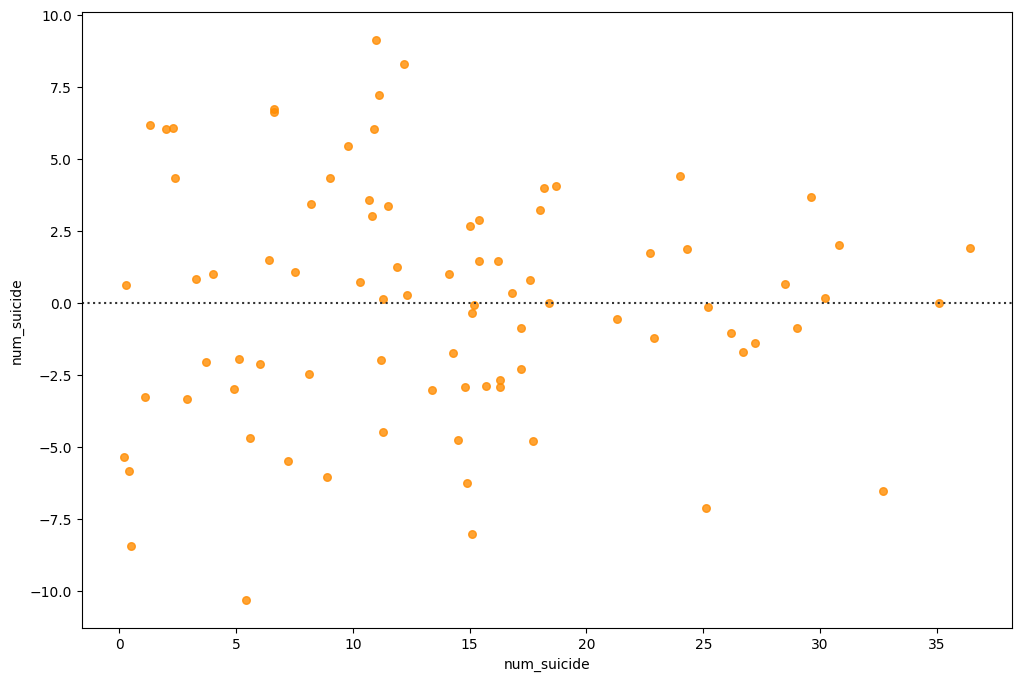

In [ ]:
residuals = y - y_pred
#define figure size
fig = plt.figure(figsize=(12,8))
# график остатков
title_axes_2 = 'График остатков'

sns.residplot(
    x=y, y=residuals,
    lowess=False,
    robust=False,
    scatter_kws={'s': 30, 'color': 'darkorange'})

plt.show()

In [ ]:

e_t = residuals
sum1 = 0
sum2 = e_t[0]**2
for i in range (1, n - 1):
  sum1 += (e_t[i] - e_t[i - 1])**2
  sum2 += e_t[i]**2
d = sum1/sum2
print(d)

n = 84
p = 0.95
m = 4
d_L = 1.31
d_U =	1.62
if (d <= 2):
  if (d < d_L):
    print("гипотеза о независимости случайных отклонений отвергается")
  elif (d > d_U):
    print("гипотеза о независимости случайных отклонений не отвергается")
  elif (d >= d_L and d <= d_U):
    print("нет достаточных оснований для принятия решения")
else:
  if (4 - d < d_L):
    print("гипотеза о независимости случайных отклонений отвергается")
  elif (4 - d > d_U):
    print("гипотеза о независимости случайных отклонений не отвергается")
  elif (4 - d >= d_L and 4 - d <= d_U):
    print("нет достаточных оснований для принятия решения")

1.8789636574595088
гипотеза о независимости случайных отклонений не отвергается
